In [2]:
#importing the libraries

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [43]:
#Loading the dataset
data = pd.read_csv("Complete_Blasting_info.csv")

In [44]:
data.head()

Unnamed: 0  PM10 (µg/m3)      Time        Date  NO (µg/m3)  PM2.5 (µg/m3)   
0           0          95.0  00:00:00  2023-02-01   14.484070           35.0  \
1           1          95.0  00:15:00  2023-02-01   14.484070           35.0   
2           2          95.0  00:30:00  2023-02-01   15.835914           35.0   
3           3         122.0  00:45:00  2023-02-01   15.914518           34.0   
4           4         122.0  01:00:00  2023-02-01   16.035640           34.0   

   NO2 (µg/m3)  NOX (ppb)  CO (mg/m3)  SO2 (µg/m3)  NH3 (µg/m3)   
0         90.1       56.2        0.31    11.986833         17.7  \
1         88.0       55.1        0.33    11.986833         18.3   
2         87.7       55.2        0.38    10.912796         19.7   
3         88.9       55.7        0.38    10.613291         21.3   
4         90.0       55.8        0.38     7.362361         22.3   

   Ozone (µg/m3)  Benzene (µg/m3)  
0           28.1              0.4  
1           27.1              0.4  
2           24.9              0.4  
3           21.9              0.4  
4           16.7              0.4

In [45]:
# Combine 'Date' and 'Time' columns into a single datetime column
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

In [46]:
# Drop the separate 'Date' and 'Time' columns
data.drop(['Date', 'Time'], axis=1, inplace=True)

In [47]:
# Set 'DateTime' column as the index
data.set_index('DateTime', inplace=True)

In [63]:
data.head(10)

PM10 (µg/m3)  NO (µg/m3)  PM2.5 (µg/m3)  NO2 (µg/m3)   
DateTime                                                                    
2023-02-01 00:00:00          95.0   14.484070           35.0         90.1  \
2023-02-01 00:15:00          95.0   14.484070           35.0         88.0   
2023-02-01 00:30:00          95.0   15.835914           35.0         87.7   
2023-02-01 00:45:00         122.0   15.914518           34.0         88.9   
2023-02-01 01:00:00         122.0   16.035640           34.0         90.0   
2023-02-01 01:15:00         122.0   17.497777           34.0         90.2   
2023-02-01 01:30:00         122.0   17.121285           34.0         88.9   
2023-02-01 01:45:00          90.0   15.532830           35.0         88.9   
2023-02-01 02:00:00          90.0   19.465702           35.0         88.9   
2023-02-01 02:15:00          90.0   22.215146           35.0         88.9   

                     NOX (ppb)  CO (mg/m3)  SO2 (µg/m3)  NH3 (µg/m3)   
DateTime                                                               
2023-02-01 00:00:00       56.2        0.31    11.986833         17.7  \
2023-02-01 00:15:00       55.1        0.33    11.986833         18.3   
2023-02-01 00:30:00       55.2        0.38    10.912796         19.7   
2023-02-01 00:45:00       55.7        0.38    10.613291         21.3   
2023-02-01 01:00:00       55.8        0.38     7.362361         22.3   
2023-02-01 01:15:00       55.9        0.37     8.494481         22.7   
2023-02-01 01:30:00       55.4        0.34     8.326684         23.1   
2023-02-01 01:45:00       55.2        0.35     8.612863         23.5   
2023-02-01 02:00:00       55.9        0.34     9.272343         23.1   
2023-02-01 02:15:00       55.3        0.35     9.457114         22.9   

                     Ozone (µg/m3)  Benzene (µg/m3)  
DateTime                                             
2023-02-01 00:00:00           28.1              0.4  
2023-02-01 00:15:00           27.1              0.4  
2023-02-01 00:30:00           24.9              0.4  
2023-02-01 00:45:00           21.9              0.4  
2023-02-01 01:00:00           16.7              0.4  
2023-02-01 01:15:00           16.1              0.4  
2023-02-01 01:30:00           22.5              0.4  
2023-02-01 01:45:00           20.5              0.4  
2023-02-01 02:00:00           22.8              0.4  
2023-02-01 02:15:00           19.0              0.4

In [49]:
data.shape

(8640, 11)

In [50]:
data = data.drop(['Unnamed: 0']  , axis = 1)

In [51]:
data.isnull().sum()

PM10 (µg/m3)       0
NO (µg/m3)         0
PM2.5 (µg/m3)      0
NO2 (µg/m3)        0
NOX (ppb)          0
CO (mg/m3)         0
SO2 (µg/m3)        0
NH3 (µg/m3)        0
Ozone (µg/m3)      0
Benzene (µg/m3)    0
dtype: int64

## Visualizing the Multivariate Time Series Data

### 1) Plotting all the observations in a single graph

<Axes: xlabel='DateTime'>

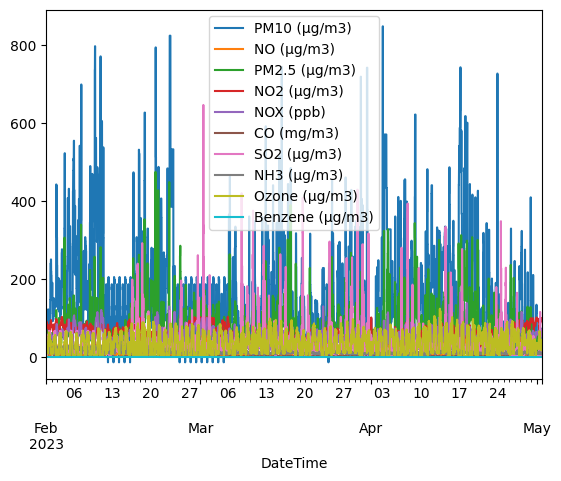

In [55]:
data.plot()

### 2) Stacked Area Plot for Time Series:

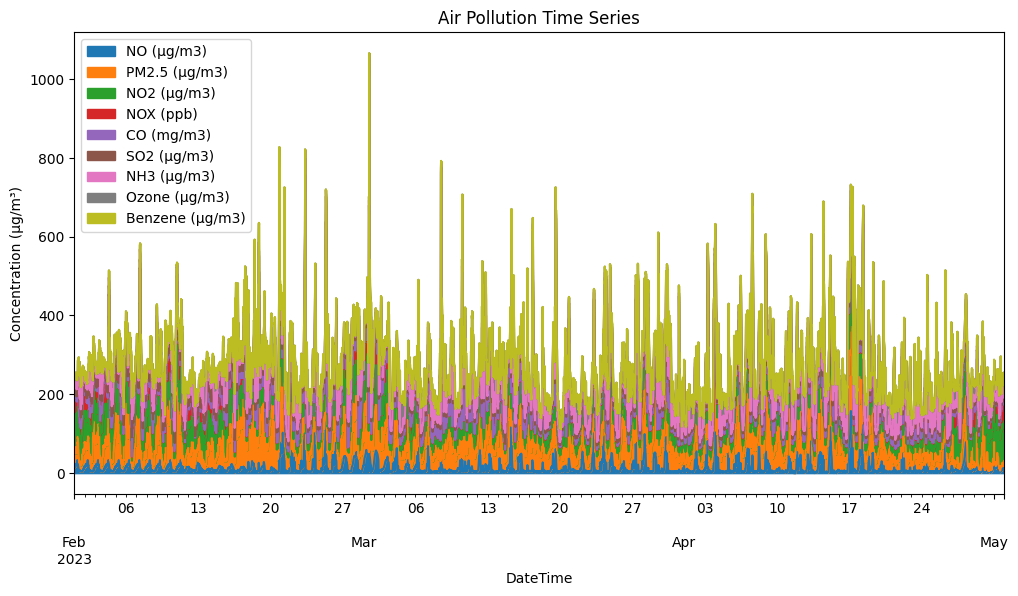

In [80]:
data.drop('PM10 (µg/m3)' , axis = 1).plot.area(figsize=(12, 6), xlabel='DateTime', ylabel='Concentration (µg/m³)', title='Air Pollution Time Series')
plt.show()

### 3) Grid Plot

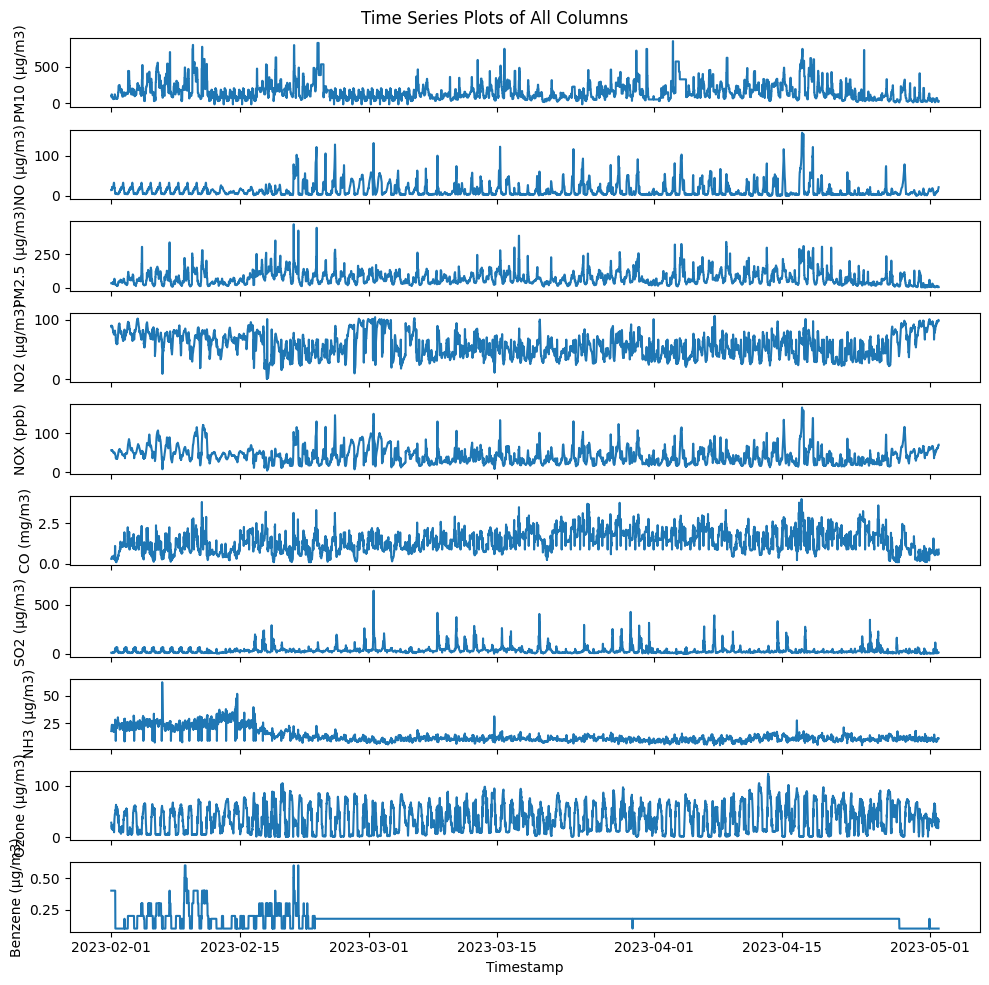

In [59]:
fig, axes = plt.subplots(nrows=len(data.columns), ncols=1, figsize=(10, 10), sharex=True)

for i, column in enumerate(data.columns):
    axes[i].plot(data.index, data[column])
    axes[i].set_ylabel(column)

axes[-1].set_xlabel('Timestamp')
plt.suptitle('Time Series Plots of All Columns')
plt.tight_layout()
plt.show()

### 4) Histogram plot of all the columns

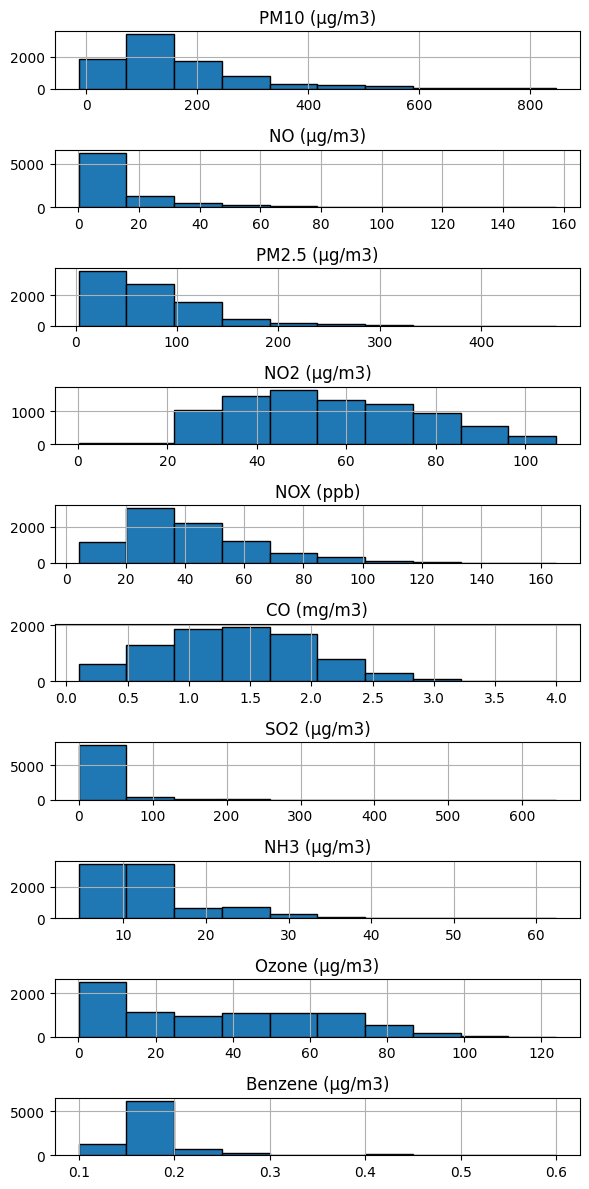

In [62]:
# Create a grid of histograms for all columns
fig, axes = plt.subplots(nrows=len(data.columns), ncols=1, figsize=(6, 12))

for i, column in enumerate(data.columns):
    data[column].hist(ax=axes[i], bins=10, edgecolor='black')
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


### Let us see the relationship between the air pollutants with each other by visualtizations

### 1) Pair-wise Plotting the different pollutants

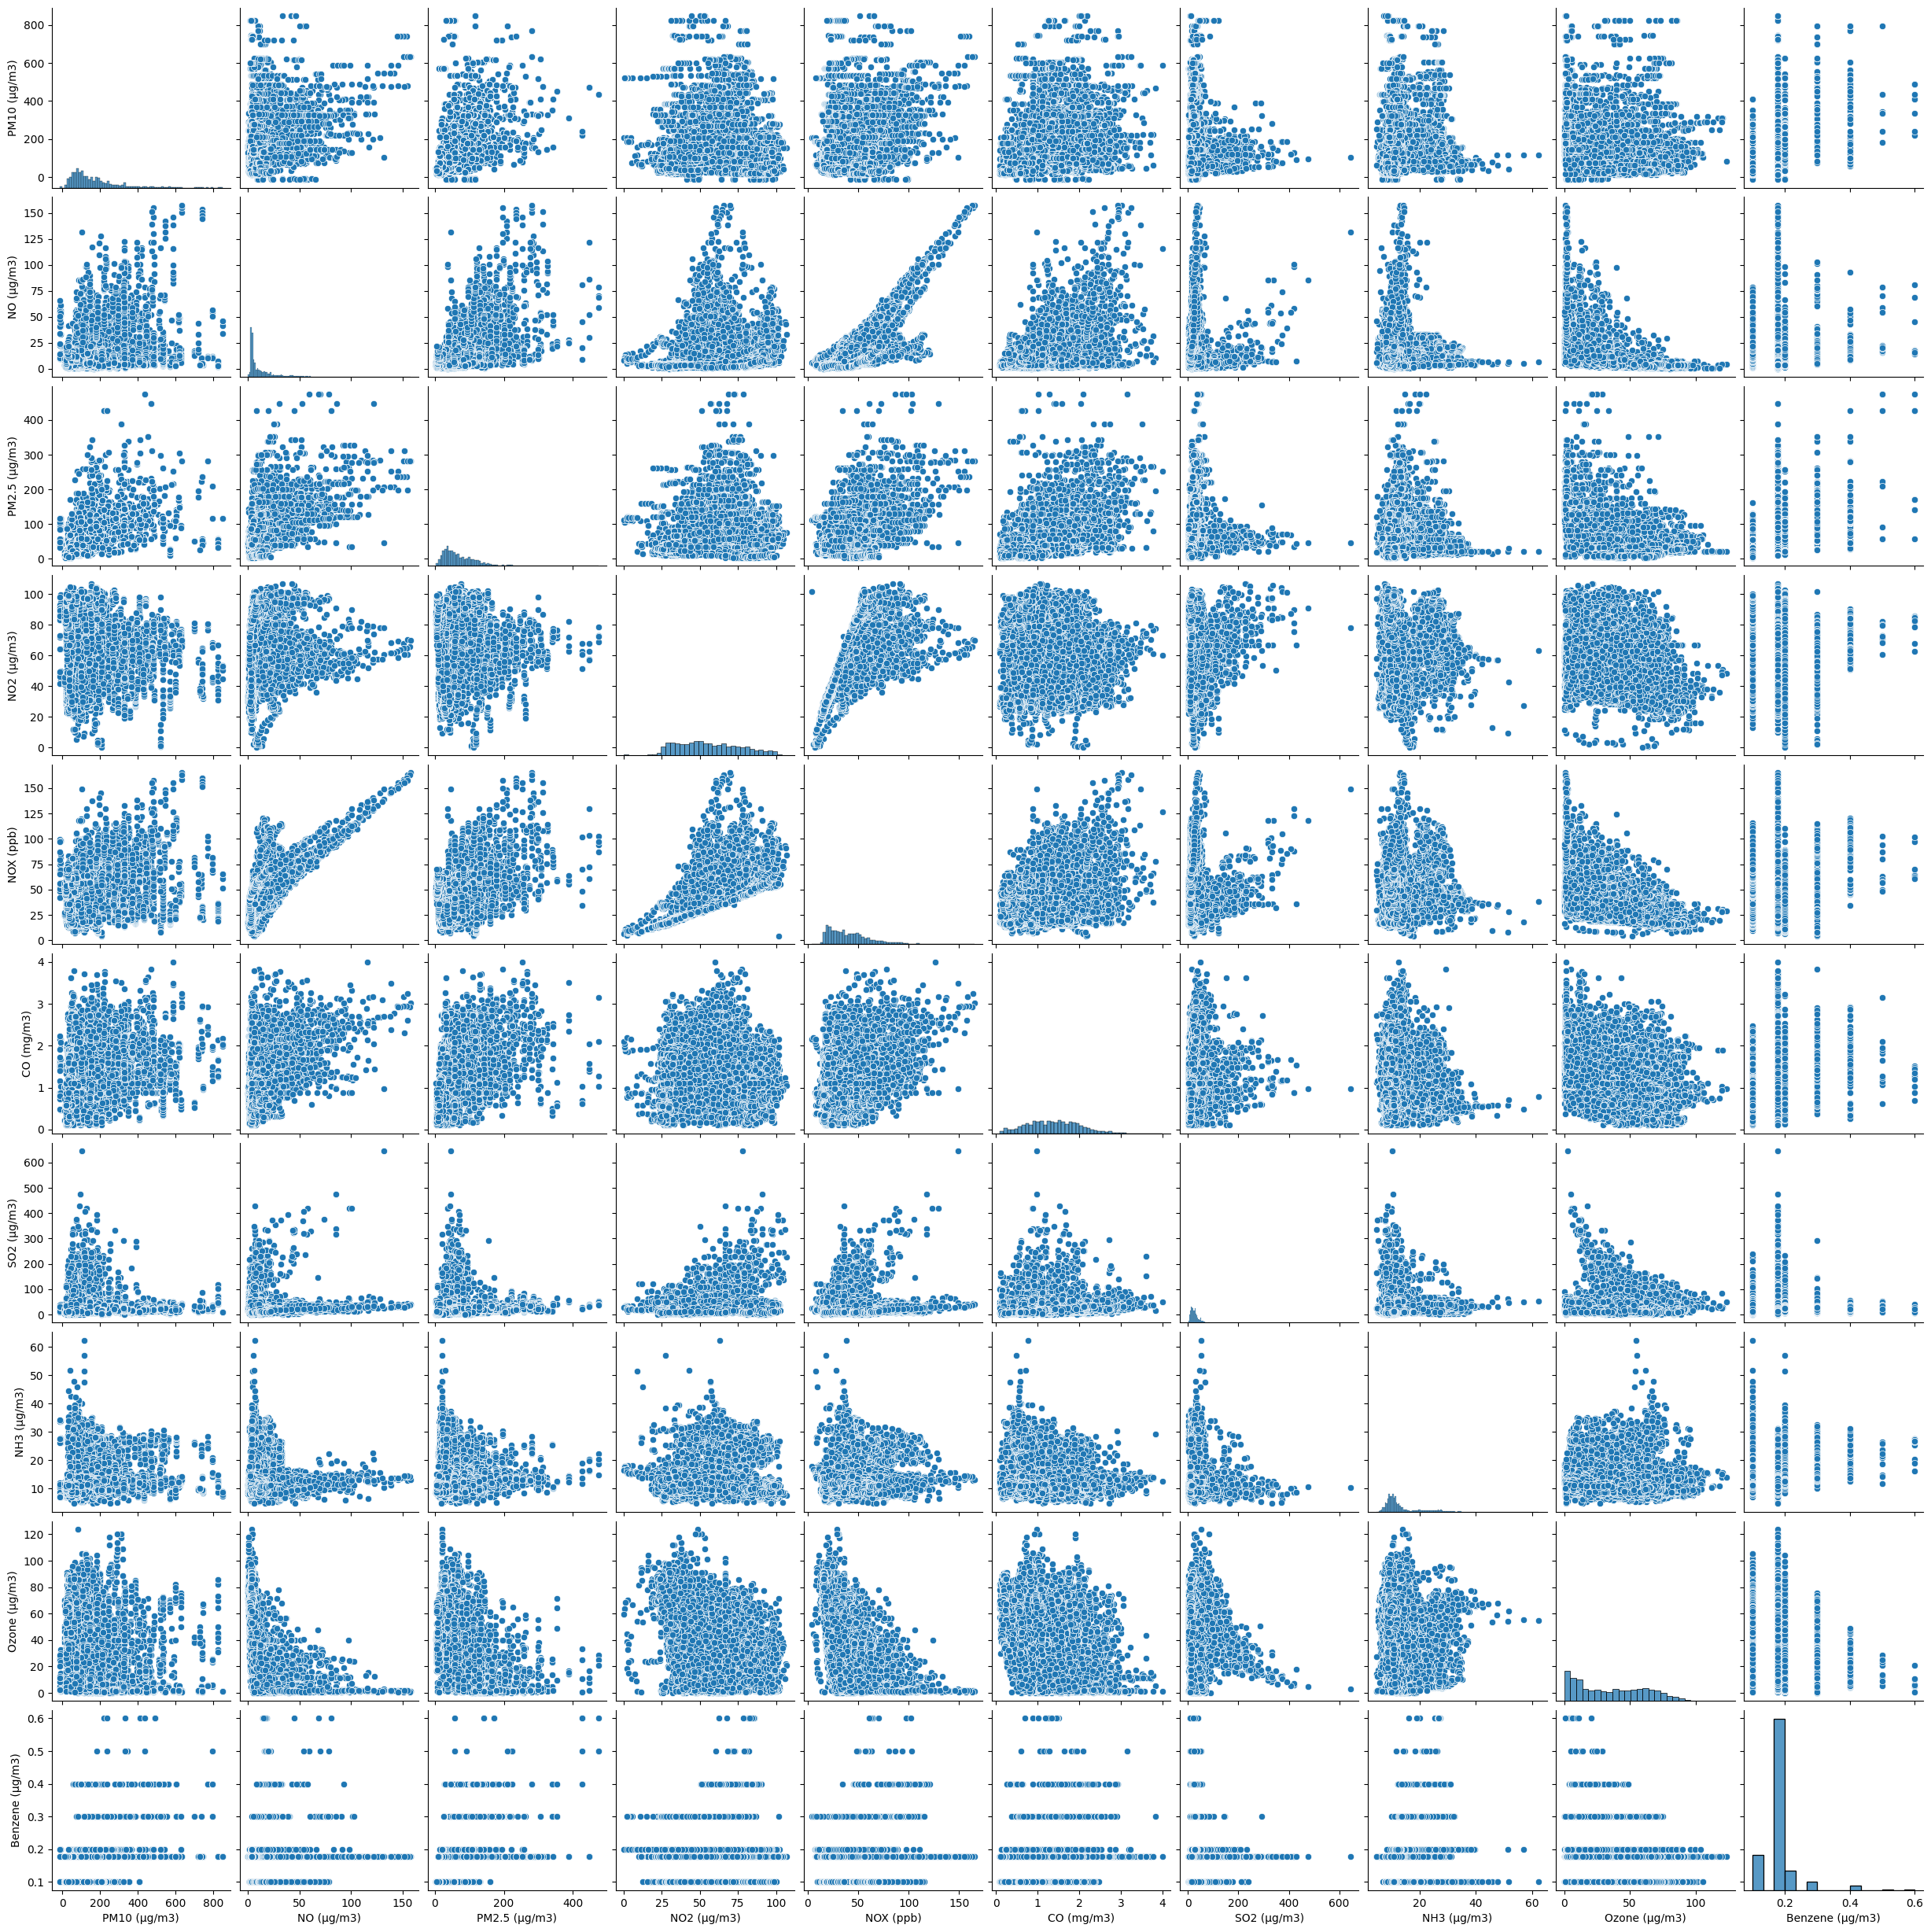

In [86]:
sns.pairplot(data)

### 2) Correlation Matrix:

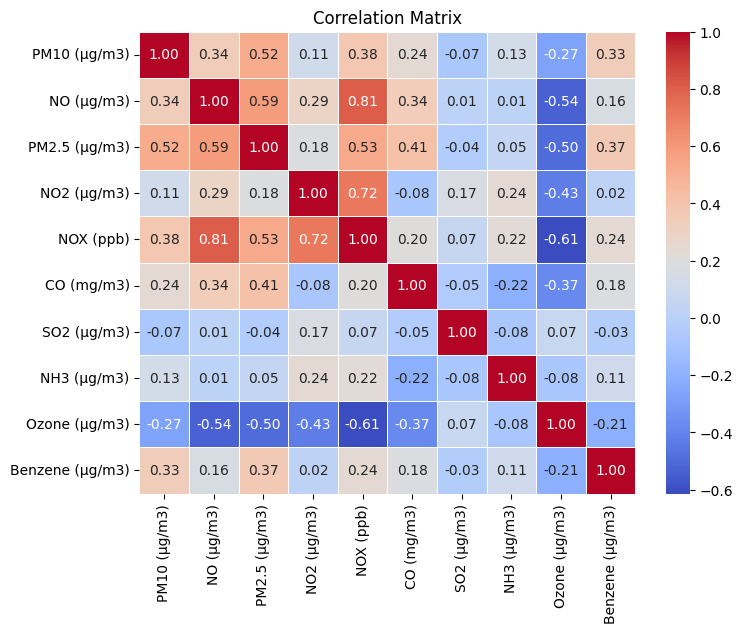

In [87]:

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### We observe that there is a strong positive association between NOX and NO, indicating multicollinearity.

.

###  Blasting time in coal India generally occurs around 13:45 pm to 14:45 pm and put a major effect on air pollution. So let us compare the two datasets and try to get some conclusions from it

In [64]:
# Extract rows between 13:45 PM and 14:45 PM

new_data = data.between_time('13:45', '14:45')
new_data.head()

PM10 (µg/m3)  NO (µg/m3)  PM2.5 (µg/m3)  NO2 (µg/m3)   
DateTime                                                                    
2023-02-01 13:45:00          73.0    4.647741           18.0         59.9  \
2023-02-01 14:00:00          73.0    4.854775           18.0         62.4   
2023-02-01 14:15:00          73.0    5.469984           18.0         61.1   
2023-02-01 14:30:00          73.0    5.736887           18.0         59.0   
2023-02-01 14:45:00          63.0    6.123021           14.0         59.2   

                     NOX (ppb)  CO (mg/m3)  SO2 (µg/m3)  NH3 (µg/m3)   
DateTime                                                               
2023-02-01 13:45:00       34.8        0.31    49.421488         20.5  \
2023-02-01 14:00:00       36.2        0.30    53.211752         20.7   
2023-02-01 14:15:00       35.0        0.31    36.971376         21.5   
2023-02-01 14:30:00       34.0        0.34    29.556898         22.0   
2023-02-01 14:45:00       34.0        0.38    27.448166         20.8   

                     Ozone (µg/m3)  Benzene (µg/m3)  
DateTime                                             
2023-02-01 13:45:00           56.9              0.1  
2023-02-01 14:00:00           56.8              0.1  
2023-02-01 14:15:00           57.1              0.1  
2023-02-01 14:30:00           55.0              0.1  
2023-02-01 14:45:00           56.3              0.1

In [118]:
# Observations for the rest of the time
new_data_1 = data.between_time('14:46' , '13:44')
new_data_1.head()

PM10 (µg/m3)  NO (µg/m3)  PM2.5 (µg/m3)  NO2 (µg/m3)   
DateTime                                                                    
2023-02-01 00:00:00          95.0   14.484070           35.0         90.1  \
2023-02-01 00:15:00          95.0   14.484070           35.0         88.0   
2023-02-01 00:30:00          95.0   15.835914           35.0         87.7   
2023-02-01 00:45:00         122.0   15.914518           34.0         88.9   
2023-02-01 01:00:00         122.0   16.035640           34.0         90.0   

                     NOX (ppb)  CO (mg/m3)  SO2 (µg/m3)  NH3 (µg/m3)   
DateTime                                                               
2023-02-01 00:00:00       56.2        0.31    11.986833         17.7  \
2023-02-01 00:15:00       55.1        0.33    11.986833         18.3   
2023-02-01 00:30:00       55.2        0.38    10.912796         19.7   
2023-02-01 00:45:00       55.7        0.38    10.613291         21.3   
2023-02-01 01:00:00       55.8        0.38     7.362361         22.3   

                     Ozone (µg/m3)  Benzene (µg/m3)  
DateTime                                             
2023-02-01 00:00:00           28.1              0.4  
2023-02-01 00:15:00           27.1              0.4  
2023-02-01 00:30:00           24.9              0.4  
2023-02-01 00:45:00           21.9              0.4  
2023-02-01 01:00:00           16.7              0.4

## Visualizing the new dataset of observations b/w 13:45 to 14:45

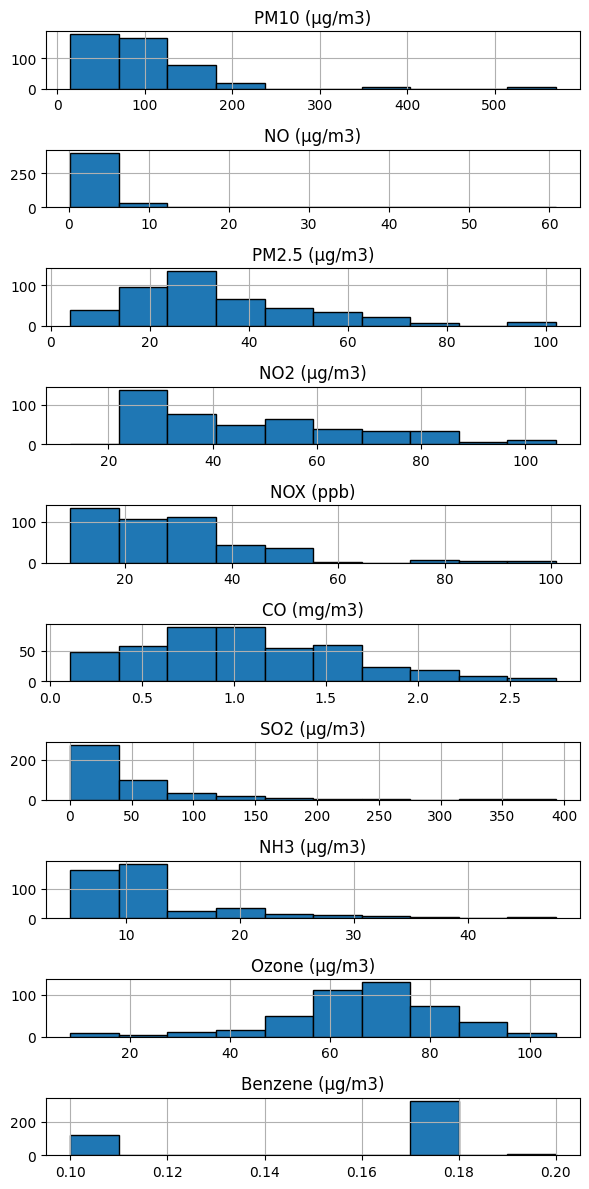

In [65]:
# Create a grid of histograms for all columns
fig, axes = plt.subplots(nrows=len(new_data.columns), ncols=1, figsize=(6, 12))

for i, column in enumerate(new_data.columns):
    new_data[column].hist(ax=axes[i], bins=10, edgecolor='black')
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


### Let us look at the Q-Q Plots to determine if the columns follow a normal distribution.

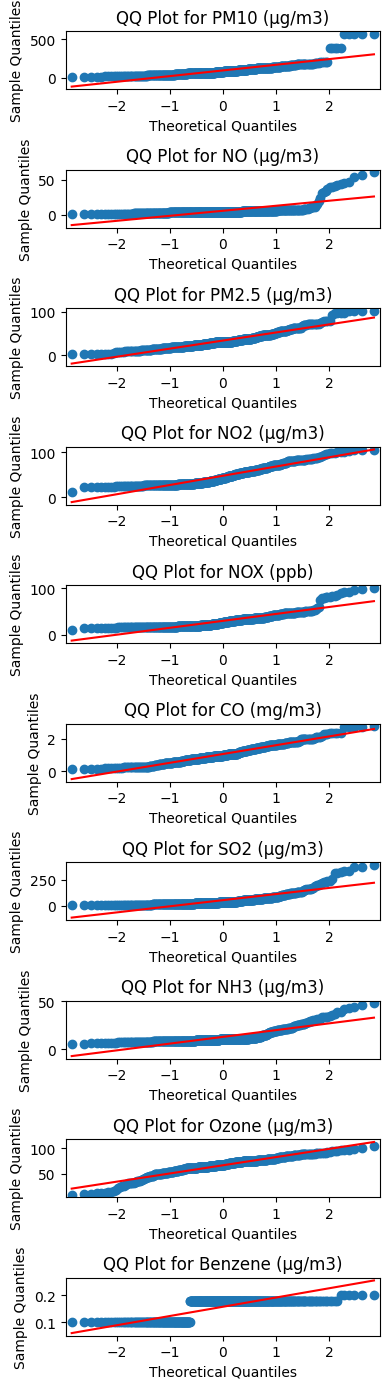

In [78]:
import statsmodels.api as sm
# Create QQ plots for all columns
fig, axes = plt.subplots(nrows=len(new_data.columns), ncols=1, figsize=(4, 14))

for i, column in enumerate(new_data.columns):
    sm.qqplot(new_data[column], line='s', ax=axes[i])
    axes[i].set_title(f'QQ Plot for {column}')

plt.tight_layout()
plt.show()

#### from the Q-Q Plots and the Histograms, we can conclude that only PM2.5 pollutant, CO pollutant and Ozone pollutant approximately follows a normal distribution.

.

### Now, we would compare the Descriptive Statistics of the two datasets

In [88]:
new_data.describe()

PM10 (µg/m3)  NO (µg/m3)  PM2.5 (µg/m3)  NO2 (µg/m3)   NOX (ppb)   
count    450.000000  450.000000     450.000000   450.000000  450.000000  \
mean      97.693250    5.490348      34.181804    47.803924   29.993426   
std       73.507027    7.259741      18.551560    20.433826   14.951182   
min       15.000000    0.200000       4.000000    12.700000    9.700000   
25%       58.250000    3.300000      21.000000    29.500000   18.225000   
50%       84.000000    3.900000      31.000000    42.150000   25.950000   
75%      123.000000    5.200000      43.750000    61.175000   36.075000   
max      570.000000   60.800000     102.000000   105.800000  100.900000   

       CO (mg/m3)  SO2 (µg/m3)  NH3 (µg/m3)  Ozone (µg/m3)  Benzene (µg/m3)  
count  450.000000   450.000000   450.000000     450.000000       450.000000  
mean     1.055087    51.798855    12.715081      66.428793         0.157137  
std      0.542093    59.394849     7.076697      16.337413         0.034589  
min      0.110000     0.500000     5.100000       8.100000         0.100000  
25%      0.660000    17.750000     8.700000      60.125000         0.100000  
50%      0.965000    30.300000    10.100000      67.850000         0.177505  
75%      1.440000    63.550000    12.275000      76.400000         0.177505  
max      2.750000   393.200000    47.700000     105.200000         0.200000

In [89]:
new_data_1.describe()

PM10 (µg/m3)   NO (µg/m3)  PM2.5 (µg/m3)  NO2 (µg/m3)    NOX (ppb)   
count   8190.000000  8190.000000    8190.000000  8190.000000  8190.000000  \
mean     168.846521    14.752009      76.848693    56.585740    43.141974   
std      129.415702    18.273803      55.467537    20.224937    22.257075   
min      -13.488183     0.100000       3.000000     0.200000     4.200000   
25%       82.000000     4.100000      37.000000    40.300000    25.600000   
50%      130.644482     7.090766      62.000000    54.300000    38.600000   
75%      216.750000    17.900000     103.000000    71.900000    54.200000   
max      847.000000   157.500000     474.000000   106.900000   165.200000   

        CO (mg/m3)  SO2 (µg/m3)  NH3 (µg/m3)  Ozone (µg/m3)  Benzene (µg/m3)  
count  8190.000000  8190.000000  8190.000000    8190.000000      8190.000000  
mean      1.411416    32.734539    13.184968      34.080895         0.178624  
std       0.626088    37.178138     6.036831      25.970518         0.053191  
min       0.100000     0.100000     4.600000       0.100000         0.100000  
25%       0.950000    14.899626     9.400000      10.400000         0.177505  
50%       1.410000    23.800000    11.000000      30.200000         0.177505  
75%       1.850000    35.400000    14.000000      55.500000         0.177505  
max       4.000000   645.600000    62.400000     123.800000         0.600000

In [90]:
new_data.median()

PM10 (µg/m3)       84.000000
NO (µg/m3)          3.900000
PM2.5 (µg/m3)      31.000000
NO2 (µg/m3)        42.150000
NOX (ppb)          25.950000
CO (mg/m3)          0.965000
SO2 (µg/m3)        30.300000
NH3 (µg/m3)        10.100000
Ozone (µg/m3)      67.850000
Benzene (µg/m3)     0.177505
dtype: float64

In [91]:
new_data_1.median()

PM10 (µg/m3)       130.644482
NO (µg/m3)           7.090766
PM2.5 (µg/m3)       62.000000
NO2 (µg/m3)         54.300000
NOX (ppb)           38.600000
CO (mg/m3)           1.410000
SO2 (µg/m3)         23.800000
NH3 (µg/m3)         11.000000
Ozone (µg/m3)       30.200000
Benzene (µg/m3)      0.177505
dtype: float64

### We can observe that the median value of SO2 and Ozone pollutant during 13:45 to 14:45 is significanly greater than rest of the day. This gives us a clear indication that, during the open pit-blasting, Ozone and Sulphur Oxide levels in air rises.

## Decomposition of Time Series
#### Let us study the time series data of Ozone Pollutant

In [124]:
univ_data = pd.DataFrame(new_data['Ozone (µg/m3)'])

<Axes: xlabel='DateTime'>

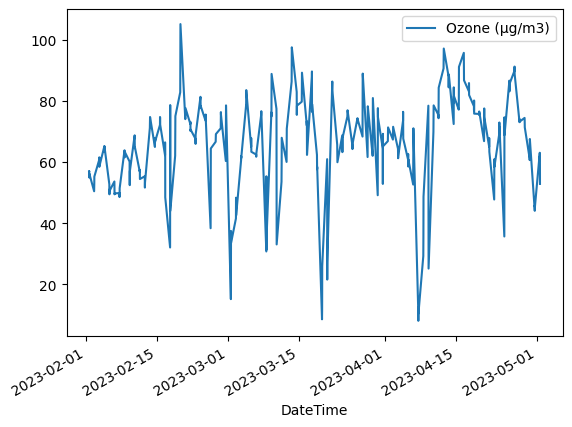

In [125]:
univ_data.plot()

#### Checking for Stationarity by adfuller Test

In [99]:
def adfuller_test(x):
    result = adfuller(x)
    labels = ['ADF Test Statistic' , 'p-value' , '#Lags Used' , 'Number of Observations Used']
    for value,label in zip(result , labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("reject null hypothesis")
    else:
        print("accept null hypothesis")

In [100]:
adfuller_test(new_data['Ozone (µg/m3)'])

ADF Test Statistic : -7.005429322242349
p-value : 7.142548345098416e-10
#Lags Used : 0
Number of Observations Used : 449
reject null hypothesis


#### Thus, by adfuller test, the time series is stationary.

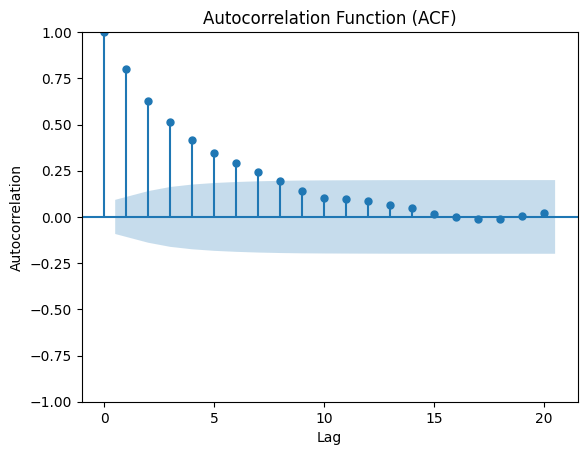

In [101]:
#plot of ACF

plot_acf(new_data['Ozone (µg/m3)'], lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

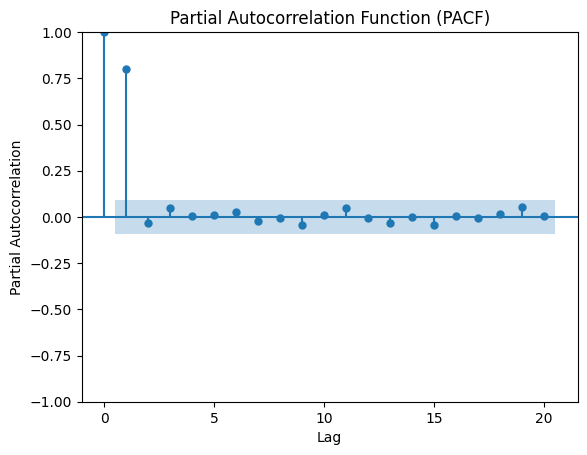

In [102]:
#plot of PACF

plot_pacf(new_data['Ozone (µg/m3)'], lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

## Fitting of ARMA Model

In [107]:
# Create an instance of the ARMA model with appropriate order values
model = ARIMA(new_data['Ozone (µg/m3)'], order=(1, 0 , 1))  # Replace p and q with desired order values

# Fit the model to the data
model_fit = model.fit()

In [116]:
predictions = model_fit.predict()

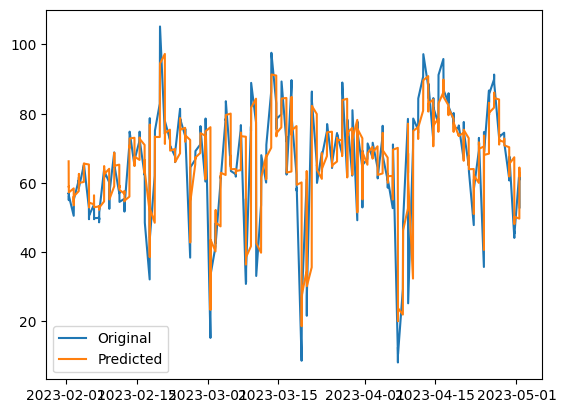

In [126]:
plt.plot(new_data['Ozone (µg/m3)'], label='Original')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

#### We can apply similar ARMA modeling techniques for other pollutants as well.

## Conclusion:

### Air pollution due to coal open pit blasting is a significant environmental concern that arises from the mining and extraction processes in coalfields. The blasting activities release large quantities of particulate matter, including suspended particulate matter (SPM) and reparable particulate matter (RPM), into the atmosphere. These pollutants pose severe health and environmental hazards, impacting both the immediate vicinity and the surrounding regions. We performed the Data Visualization of the several air pollutants. We observed that there is a positive correlation among some of the pollutants. 

### We have plotted the pollutant levels during the blasting periods which generally lasts between 13:45 and 14:45. Ozone and Sulphates concentration in the atmosphere rises rapidly during this time. During coal open pit blasting, the concentration of ozone (O3) and sulfur oxides (SOx), such as sulfur dioxide (SO2), can increase in the atmosphere due to various chemical and physical processes that take place during the blasting activity. These increases in O3 and SOx concentrations are primarily attributed to the following factors:
##### 1) Chemical Reactions:
##### 2) Dispersion and Transport:
##### 3) Inefficient Combustion:
##### 4) Meteorological Conditions:
### Overall, coal open pit blasting contributes to the release of various pollutants, including nitrogen oxides and sulfur dioxide, which can subsequently lead to increased ozone and sulfur oxide concentrations in the atmosphere. These pollutants have adverse effects on air quality, human health, and the environment, emphasizing the importance of implementing emission control measures and adopting cleaner technologies to mitigate air pollution during coal mining activities.